In [12]:
import pandas as pd  # For data handling
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For advanced visualizations

# Load the dataset
data = pd.read_csv("diabetes_ORG.csv")

# Display basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [2]:
# Display the first few rows of the dataset
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


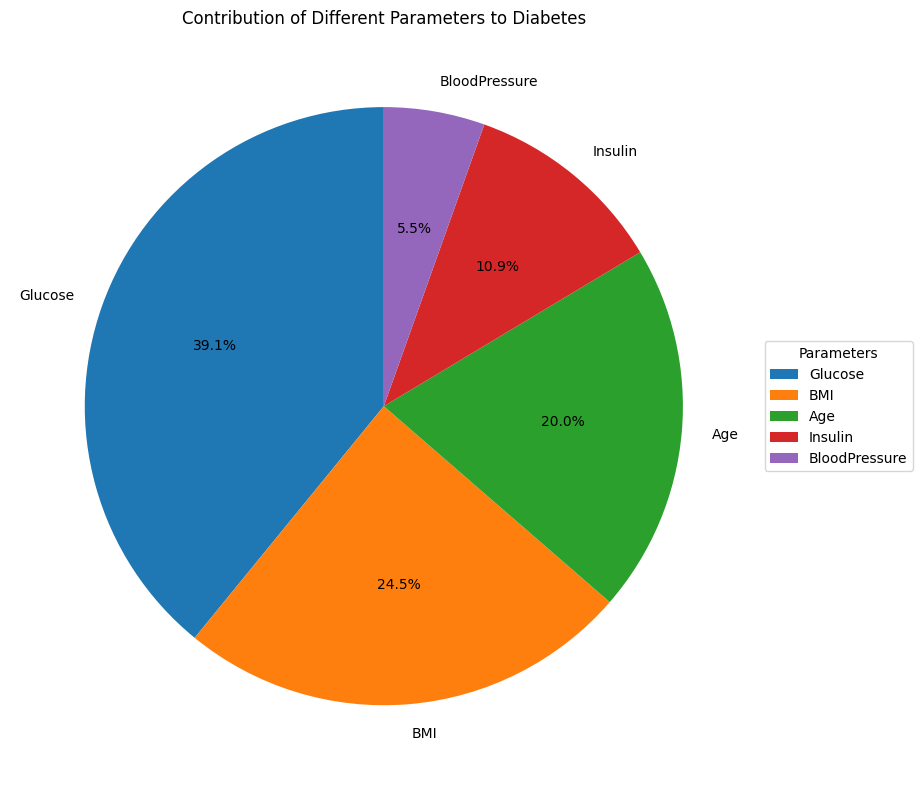


Correlation values with Diabetes:
Glucose: 0.467
BMI: 0.293
Age: 0.238
Insulin: 0.131
BloodPressure: 0.065


In [3]:
# Parameters to evaluate
parameters = ['Glucose', 'BMI', 'Age', 'BloodPressure', 'Insulin']

# Calculate absolute correlations with Outcome
correlations = data[parameters + ['Outcome']].corr()['Outcome'].abs()
correlations = correlations[:-1]  # Exclude self-correlation of Outcome

# Sort correlations
correlations_sorted = correlations.sort_values(ascending=False)

# Create pie chart for parameter contributions
plt.figure(figsize=(10, 8))
plt.pie(correlations_sorted, labels=correlations_sorted.index, 
        autopct='%1.1f%%', startangle=90)

# Add title and legend
plt.title('Contribution of Different Parameters to Diabetes')
plt.legend(correlations_sorted.index, title="Parameters",
           loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.tight_layout()
plt.show()

# Print correlation values
print("\nCorrelation values with Diabetes:")
for param, corr in correlations_sorted.items():
    print(f"{param}: {corr:.3f}")

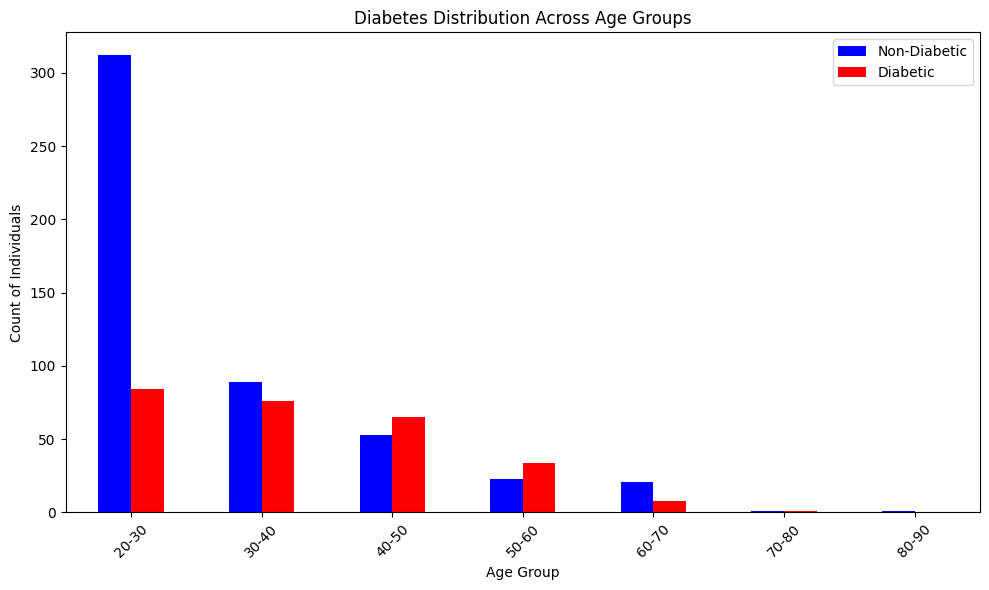

In [4]:
# Define age groups and labels
age_bins = [20, 30, 40, 50, 60, 70, 80, 90]
age_labels = ['20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90']

# Categorize individuals into age groups
data['AgeGroup'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels, right=False)

# Count diabetic (Outcome=1) and non-diabetic (Outcome=0) individuals in each age group
age_group_counts = data.groupby(['AgeGroup', 'Outcome']).size().unstack(fill_value=0)

# Plot a bar graph for diabetes distribution across age groups
age_group_counts.plot(kind='bar', stacked=False, color=['blue', 'red'], figsize=(10, 6))

# Set labels and title
plt.xlabel('Age Group')
plt.ylabel('Count of Individuals')
plt.title('Diabetes Distribution Across Age Groups')
plt.xticks(rotation=45)
plt.legend(['Non-Diabetic', 'Diabetic'])
plt.tight_layout()

# Show the plot
plt.show()

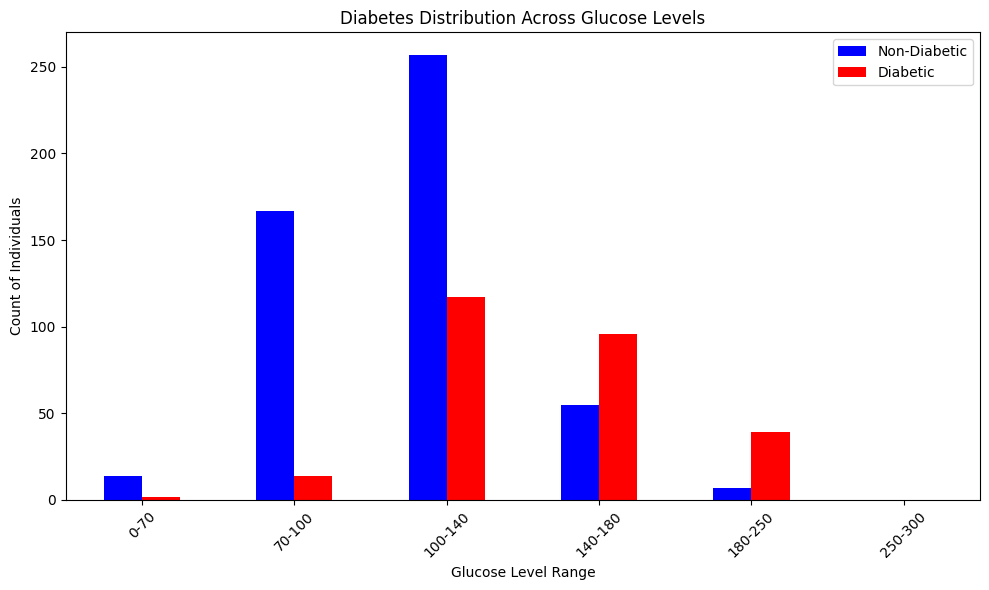

In [5]:
# Define glucose level ranges and labels
glucose_bins = [0, 70, 100, 140, 180, 250, 300]
glucose_labels = ['0-70', '70-100', '100-140', '140-180', '180-250', '250-300']

# Categorize individuals into glucose level groups
data['GlucoseGroup'] = pd.cut(data['Glucose'], bins=glucose_bins, labels=glucose_labels, right=False)

# Count diabetic (Outcome=1) and non-diabetic (Outcome=0) individuals in each glucose group
glucose_group_counts = data.groupby(['GlucoseGroup', 'Outcome']).size().unstack(fill_value=0)

# Plot a bar graph for diabetes distribution across glucose levels
glucose_group_counts.plot(kind='bar', stacked=False, color=['blue', 'red'], figsize=(10, 6))

# Set labels and title
plt.xlabel('Glucose Level Range')
plt.ylabel('Count of Individuals')
plt.title('Diabetes Distribution Across Glucose Levels')
plt.xticks(rotation=45)
plt.legend(['Non-Diabetic', 'Diabetic'])
plt.tight_layout()

# Show the plot
plt.show()

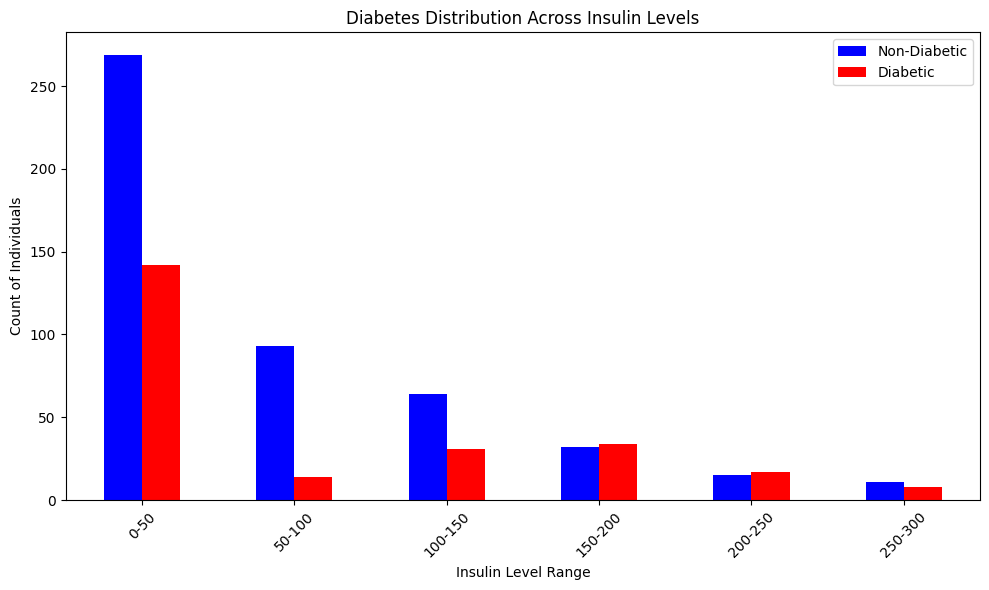

In [6]:
# Define insulin level ranges and labels
insulin_bins = [0, 50, 100, 150, 200, 250, 300]
insulin_labels = ['0-50', '50-100', '100-150', '150-200', '200-250', '250-300']

# Categorize individuals into insulin level groups
data['InsulinGroup'] = pd.cut(data['Insulin'], bins=insulin_bins, labels=insulin_labels, right=False)

# Count diabetic (Outcome=1) and non-diabetic (Outcome=0) individuals in each insulin group
insulin_group_counts = data.groupby(['InsulinGroup', 'Outcome']).size().unstack(fill_value=0)

# Plot a bar graph for diabetes distribution across insulin levels
insulin_group_counts.plot(kind='bar', stacked=False, color=['blue', 'red'], figsize=(10, 6))

# Set labels and title
plt.xlabel('Insulin Level Range')
plt.ylabel('Count of Individuals')
plt.title('Diabetes Distribution Across Insulin Levels')
plt.xticks(rotation=45)
plt.legend(['Non-Diabetic', 'Diabetic'])
plt.tight_layout()

# Show the plot
plt.show()

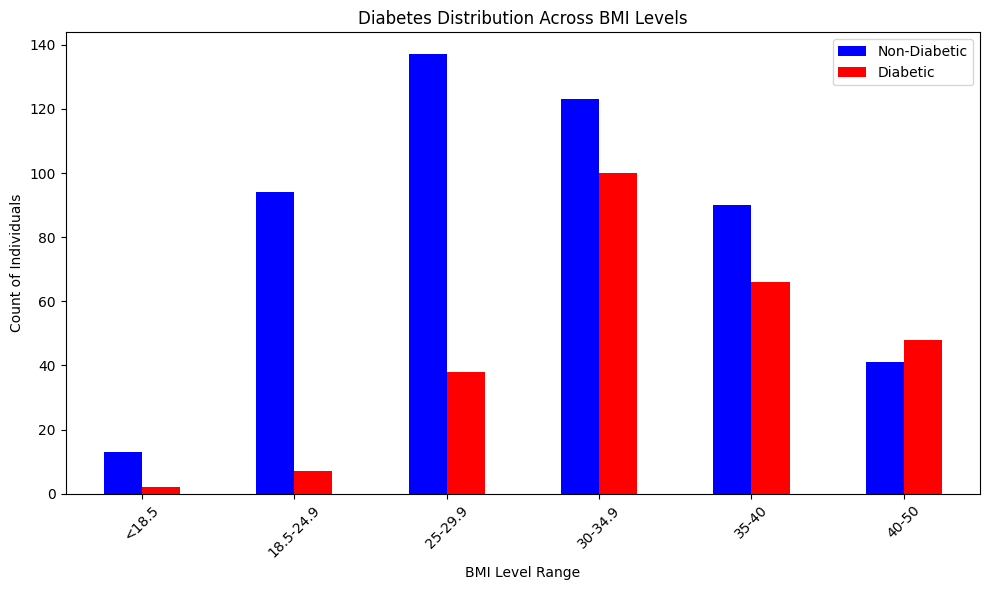

In [7]:
# Define BMI level ranges and labels
bmi_bins = [0, 18.5, 24.9, 29.9, 34.9, 40, 50]  # BMI ranges (underweight, normal, overweight, etc.)
bmi_labels = ['<18.5', '18.5-24.9', '25-29.9', '30-34.9', '35-40', '40-50']

# Categorize individuals into BMI groups
data['BMIGroup'] = pd.cut(data['BMI'], bins=bmi_bins, labels=bmi_labels, right=False)

# Count diabetic (Outcome=1) and non-diabetic (Outcome=0) individuals in each BMI group
bmi_group_counts = data.groupby(['BMIGroup', 'Outcome']).size().unstack(fill_value=0)

# Plot a bar graph for diabetes distribution across BMI levels
bmi_group_counts.plot(kind='bar', stacked=False, color=['blue', 'red'], figsize=(10, 6))

# Set labels and title
plt.xlabel('BMI Level Range')
plt.ylabel('Count of Individuals')
plt.title('Diabetes Distribution Across BMI Levels')
plt.xticks(rotation=45)
plt.legend(['Non-Diabetic', 'Diabetic'])
plt.tight_layout()

# Show the plot
plt.show()

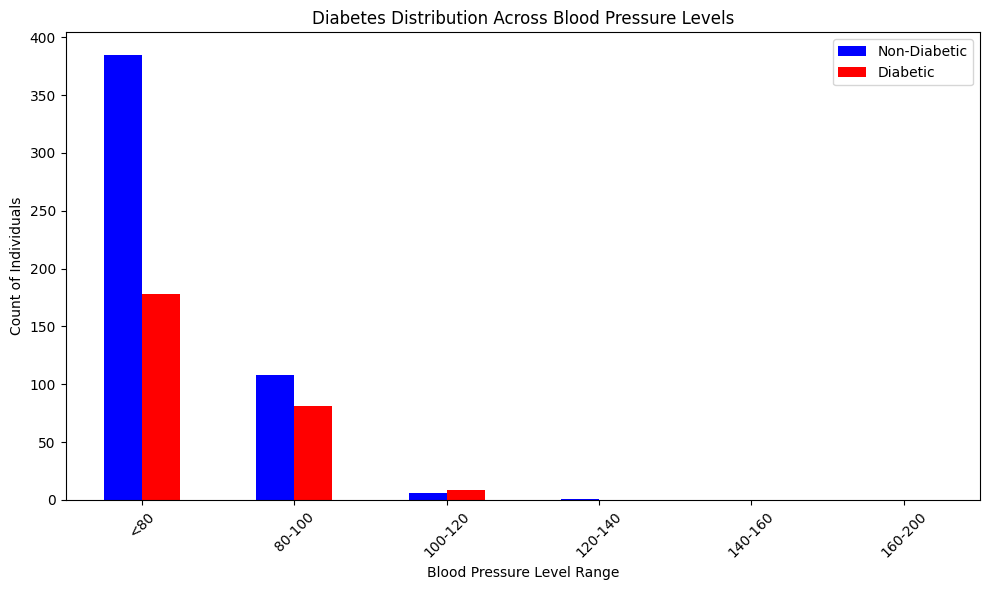

In [8]:
# Define blood pressure level ranges and labels
bp_bins = [0, 80, 100, 120, 140, 160, 200]  # Blood pressure ranges
bp_labels = ['<80', '80-100', '100-120', '120-140', '140-160', '160-200']

# Categorize individuals into blood pressure groups
data['BloodPressureGroup'] = pd.cut(data['BloodPressure'], bins=bp_bins, labels=bp_labels, right=False)

# Count diabetic (Outcome=1) and non-diabetic (Outcome=0) individuals in each blood pressure group
bp_group_counts = data.groupby(['BloodPressureGroup', 'Outcome']).size().unstack(fill_value=0)

# Plot a bar graph for diabetes distribution across blood pressure levels
bp_group_counts.plot(kind='bar', stacked=False, color=['blue', 'red'], figsize=(10, 6))

# Set labels and title
plt.xlabel('Blood Pressure Level Range')
plt.ylabel('Count of Individuals')
plt.title('Diabetes Distribution Across Blood Pressure Levels')
plt.xticks(rotation=45)
plt.legend(['Non-Diabetic', 'Diabetic'])
plt.tight_layout()

# Show the plot
plt.show()

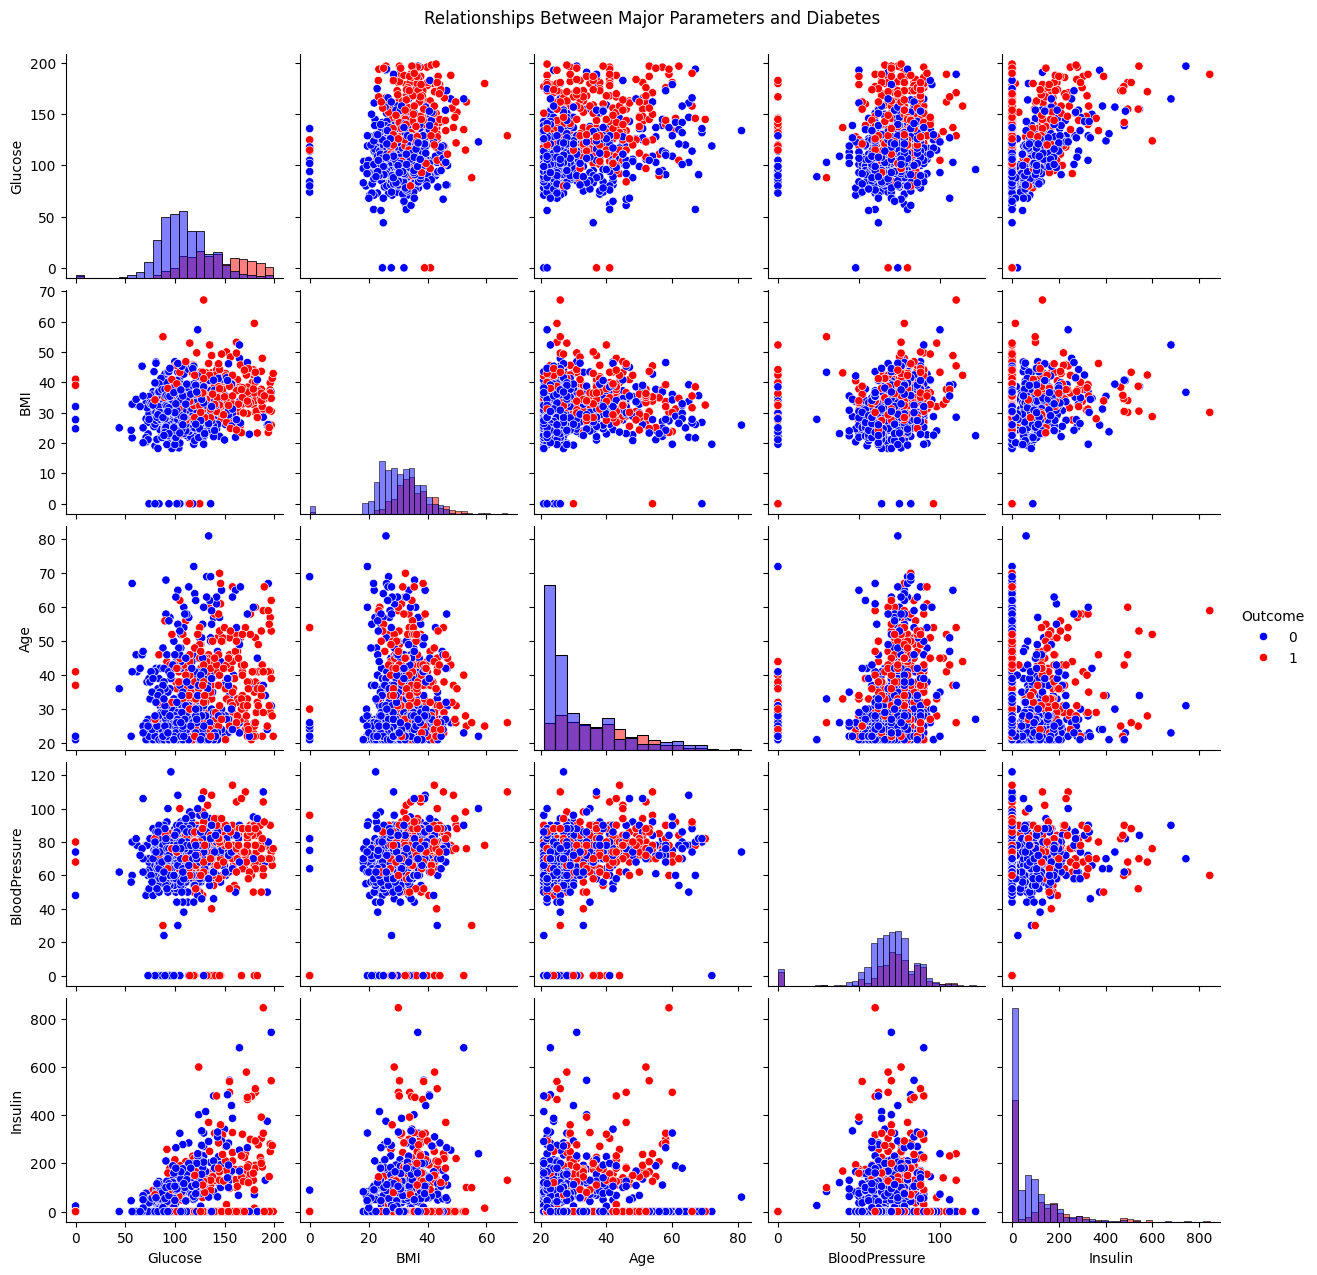


Correlations with Diabetes:
Glucose          0.466581
BMI              0.292695
Age              0.238356
Insulin          0.130548
BloodPressure    0.065068
Name: Outcome, dtype: float64


In [9]:
# Select major parameters to analyze
parameters = ['Glucose', 'BMI', 'Age', 'BloodPressure', 'Insulin']

# Define color palette for diabetic (red) and non-diabetic (blue)
colors = {0: 'blue', 1: 'red'}

# Generate pair plot to show relationships between parameters and diabetes
sns.pairplot(data[parameters + ['Outcome']], 
             hue='Outcome', 
             palette=colors, 
             diag_kind='hist')  # Use histogram on diagonal

# Add title to the pair plot
plt.suptitle('Relationships Between Major Parameters and Diabetes', y=1.02)

# Display the plot
plt.show()

# Calculate correlations with diabetes outcome, sort by strength, and exclude self-correlation
correlations = data[parameters + ['Outcome']].corr()['Outcome'].drop('Outcome').sort_values(ascending=False)

# Print sorted correlations
print("\nCorrelations with Diabetes:")
print(correlations)